<a href="https://colab.research.google.com/github/Michael-Holland-Dev/CS180/blob/main/data_science_labs/data_science_lab_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BYU CS 180 Lab 9

In [37]:
# Dependencies for the lab
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import random
from sklearn import datasets

## Introduction:
Say you're given a dataset where each data point has a set of features, but has no labels. Labels are an essential ingredient to supervised algorithms like Support Vector Machines, which predicts labels given features. Since we don't have labels, we can't run supervised learning. What can we do?

One of the easiest tasks we can perform on a dataset without labels is to group similar data points together. This is known as clustering.

K-Means is one of the most popular clustering algorithms. It creates k centroids that are used to define clusters. Centroids are points that mark the center of a cluster. A data point is assigned to a cluster if it is closer to that cluster's centroid than any other controid.

K-Means finds the best centroids by alternating between one, assigning data points to clusters based on the current centroids, and two, choosing centroids based on the current cluster assignment of data points.

image-20211015-173502.png

Figure 1: K-means algorithm. Training examples are shown as dots, and cluster centroids are shown as crosses. (a) Original dataset. (b) Random initial cluster centroids. (c-f) Illustration of running two iterations of k-means. In each iteration, we assign each training example to the closest cluster centroid (shown by painting the training examples the same color as the cluster centroid to which is assigned); then we move each cluster centroid to the mean of the points assigned to it. Images courtesy of Michael Jordan (no, not that Micheal Jordan).

In the clustering problem, we are given a set of feature vectors for each data point, represented as $x_i$, without any corresponding labels $y_i$. This makes it an unsupervised learning problem, where our goal is to group the data points into a few coherent clusters by predicting k centroids and a label $c_i$ for each data point. The label $c_i$ represents the cluster assignment for $x_i$. The k-means clustering algorithm follows these steps at a high level:



1. Initialize cluster centroids randomly. $μ_1, μ_2, μ_3,....μ_k ∈ ℝ^n$

2. Assign each data point to the closest cluster centroid. $c^{(i)}:=arg \underset{j}{min} ||x^{(i)} - μ_j ||^2 $

3. Move each cluster centroid to the mean of the points assigned to it. $μ_j := \frac{∑_{i=1}^m 1 \{c^{(i)} = j\} x^{(i)} }{∑_{i=1}^m 1 \{c^{(i)} = j\}} $

4. Repeat steps 2 and 3 until convergence.




## Exercise 1: K-an you do it? Yes you can!

The datasets used in this lab are 2d numpy arrays with each column representing a feature and each row representing a data point. They'll look something like this (column and row numbers are just for illustration purposes):

|          | Feature 1 | Feature 2 | Feature n |
|----------|----------|----------|----------|
| Point 1  | number   | number   | number   |
| Point 2  | number   | number   | number   |
| Point 3  | number   | number   | number   |
| Point i  | number   | number   | number   |

<br><br>
The centroids are stored in a 2d numpy array where each row represents a centroid and each column represents a feature. They'll look something like this (again, column and row numbers are just for illustration purposes):

|          | Feature 1 | Feature 2 | Feature n |
|----------|----------|----------|----------|
| Centroid 1  | number   | number   | number   |
| Centroid 2  | number   | number   | number   |
| Centroid k  | number   | number   | number   |

<br><br>
Finally, The labels are stored in a 1d numpy array where the ith element represents the label of the ith data point. They'll look something like this (column numbers are just for illustration purposes):

| Label 1 | Label 2 | Label 3 | Label i |
|----------|----------|----------|----------|
| Centroid (1-k) | Centroid (1-k) | Centroid (1-k) | Centroid (1-k) |


Now that you undertand the format of the variables, let's start implementing the functions! You'll be implementing the following functions:
*   Get Number of Features
*   Get Random Centroids
*   Get Centroids
*   Get Labels
*   Should Stop

### Function: Get Number of Features
Implement get_num_features, which returns the number of features in the dataset. This corresponds to the number of columns in your dataset array.

In [38]:
def get_num_features(dataset):
  # Find the number of features in the dataset
  pass

### Function: Get Random Centroids
Implement get_random_centroids, which randomly initialize k centroids, each with n features, and then returns them. Each featrue should be randomly initialized to a value between -1 and 1.

In [39]:
def get_random_centroids(n, k):
  # Randomly initialize k centroids
  pass

### Function: Get Centroids
Implement get_centroids, which returns k random centroids, each of size n. Each centroid is the arethmetic mean of the points that have that centroid's label. 

**Important**: If a centroid is empty (no points have that centroid's label), you should randomly re-initialize it.

In [40]:
def get_centroids(dataset, labels, k):
  # Compute/randomly initialize centroids
  pass

### Function: Get Labels
Implement get_labels, which returns an array of labels, one for each data point. For each point in the dataset, label it with the closest centroid. Make that centroid the element's label.

In [41]:
def get_labels(dataset, centroids):
  # Assign each data point a label in this function according to the centroids
  pass

### Function: Should Stop
Implement should_stop, which returns True if the K-Means algorithm is done (and False otherwise). K-Means terminates either because it has iterated a maximum number of times or the centroids have stopped changing. You can tell the centroids have stopped changing if the old centroids are equal to the new centroids.

In [42]:
def should_stop(old_centroids, centroids, iterations, max_iterations):
  # Check if the centroids have converged or the maximum number of iterations has been reached
  pass

## Prebuilt Functions:

### Function: Plot Dataset
This function plots the dataset with the centroids. You'll use this function to plot iterations of your K-Means algorithm.


In [43]:
def plot_dataset(plot_title, dataset, labels=None, centroids=None):
  # the colors to use for different clusters and centroids
  point_colors = np.array(['red', 'green', 'blue'])
  centroid_colors = np.array(['darkred', 'darkgreen', 'darkblue'])

  # if no labels are provided, use all zeros
  if labels is None:
    labels = np.zeros(len(dataset)).astype(int)

  # plot each data point with the corresponding color
  plt.scatter(dataset[:, 0], dataset[:, 1], color=point_colors[labels], s=0.2)
  
  # plot the centroids
  if centroids is not None:
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=55, linewidths=2.5, color=centroid_colors[:len(centroids)])

  plt.title(plot_title)
  plt.show()

### Function: K Means
The kmeans function is what puts it all together. It takes in a dataset, a constant k, and a maximum number of iterations and returns. It'll return k centroids.

In [44]:
# We can get the labels too by calling getLabels(dataset, centroids)

def kmeans(dataset, k, max_iterations=100):
    # Initialize centroids randomly
    num_features = get_num_features(dataset)
    centroids = get_random_centroids(num_features, k)
    
    # Initialize book keeping vars.
    iterations = 0
    old_centroids = None
    print(iterations)
    
    # Run the main k-means algorithm
    while not should_stop(old_centroids, centroids, iterations, max_iterations):
        # Save old centroids for convergence test. Book keeping.
        old_centroids = centroids
        iterations += 1
        
        # Assign labels to each datapoint based on centroids
        labels = get_labels(dataset, centroids)
        
        # Assign centroids based on datapoint labels
        centroids = get_centroids(dataset, labels, k)

    # Return the centroids
    return centroids

## Exercise 2

In [45]:
# Generates a dataset called blobs
blobs = datasets.make_blobs(n_samples=1500, random_state=8)[0]
blobs /= np.amax(blobs)

Run the K-Means algorithm on blobs dataset 3 times. The runs should be as follows:

1.   3 centroids, 0 iterations
2.   3 centroids, 9 iterations
3.   3 centroids, 100 iterations

Plot each of the runs using a seperate graph. **Hint**: You can use the get_labels function to find the labels from the resulting centroids. Make sure to label each plot with its maximum iterations.


0


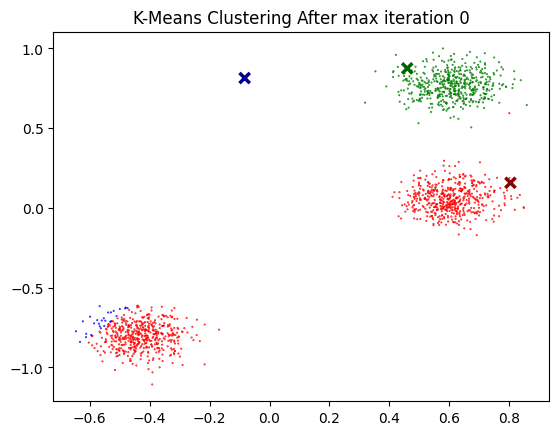

0


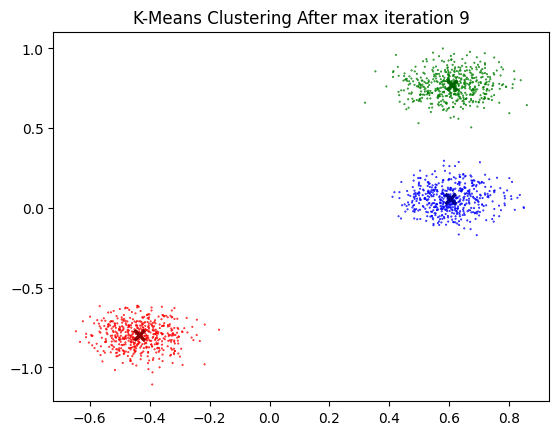

0


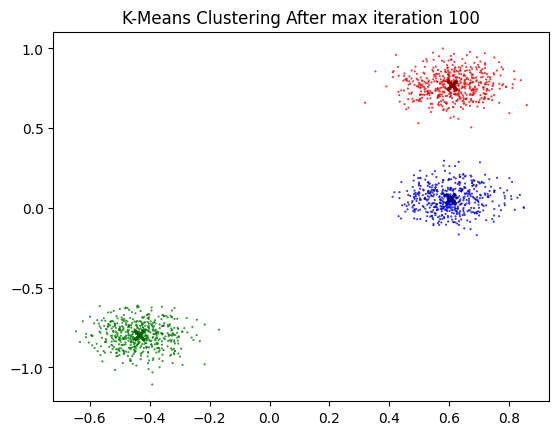

In [46]:
# Enter your code for exercise 2 here


What do you notice about the predicted clusters as the iterations increase?

>(Enter answer here)

Does the number of centroids (k=3) acurately fit the data? Why or why not?

>(Enter answer here)

Discuss the quality of the clustering. How well does K-Means perform on this dataset?

>(Enter answer here)

## Exercise 3

In [47]:
# Generates a dataset called noisy_moons
noisy_moons = datasets.make_moons(n_samples=1500, noise=0.05, random_state=8)[0]
noisy_moons /= np.amax(noisy_moons)

Run the K-Means algorithm on noisy moons dataset 3 times. The runs should be as follows:

1.   3 centroids, 0 iterations
2.   3 centroids, 9 iterations
3.   3 centroids, 100 iterations

Make sure to label each plot with its maximum iterations.


0


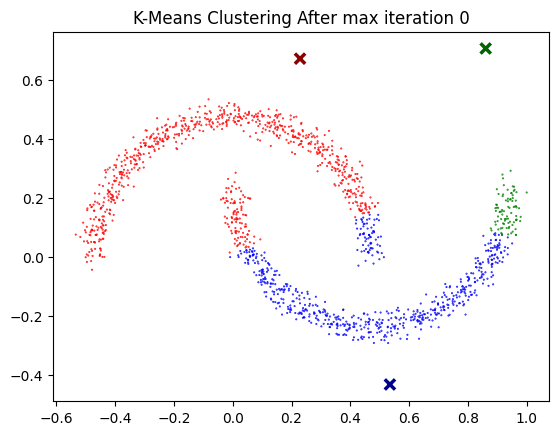

0


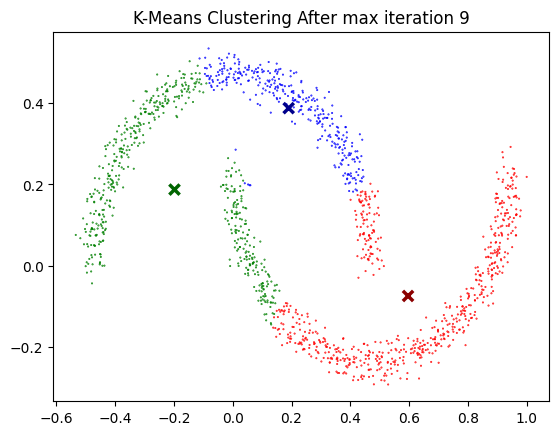

0


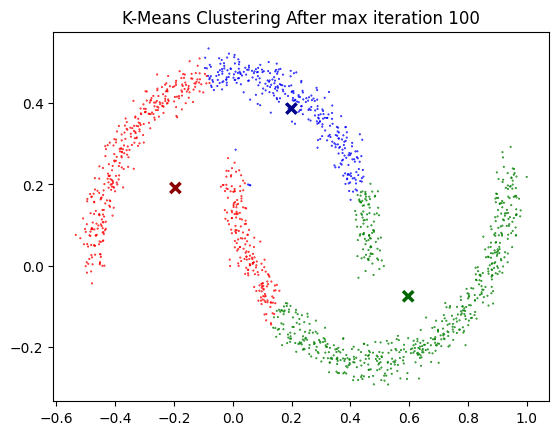

In [48]:
# Enter your code for exercise 3 here


What do you notice about the predicted clusters as the iterations increase?

>(Enter answer here)

Does the number of centroids (k=3) acurately fit the data? Why or why not?

>(Enter answer here)

Discuss the quality of the clustering. How well does K-Means perform on this dataset?

>(Enter answer here)

## Exercise 4
Write a paragraph about what you learned from this lab.

>(Enter answer here)